<p style="background:#07D; color:#FFF; font-size:40px; font-weight:700; text-align:center">TP PDEs and Image Processing</p>

<p style="font-size:20px; font-weight:800 ;text-align:center">SOUDJAY KADHOI ET FARIUS AINA

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from scipy.signal import convolve2d
from Fonctions import *
from Fonctions2 import *

### Load Image

In [2]:
# Load image
Im_data = load_img('cameraman.png')

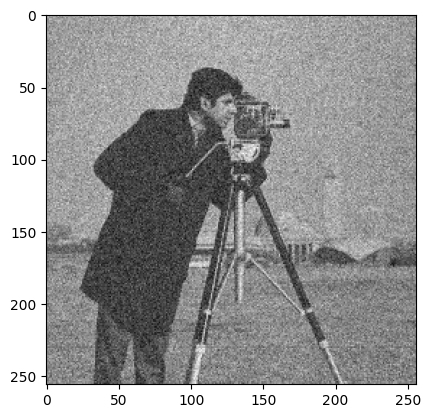

In [3]:
# Noise image
Im_noised = add_gaussian_noise(Im_data, s=30)

bounds = {'vmin': 0, 'vmax': 255}
plt.imshow(Im_noised, cmap='gray')

plt.show()

### Test of `Denoise_Tikhonov` 

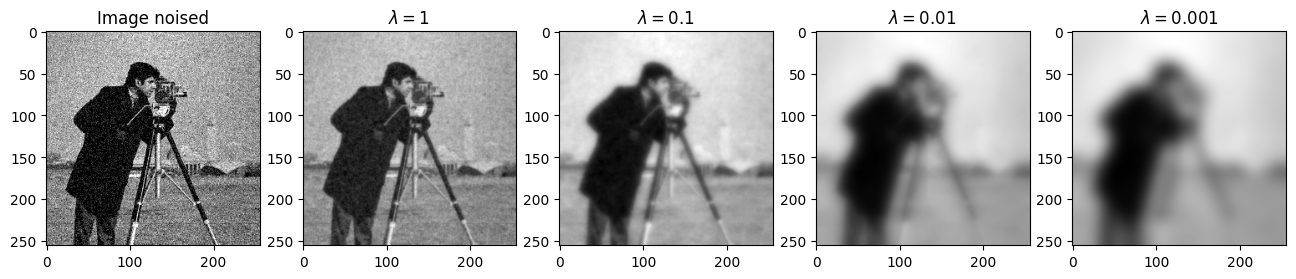

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16, 6))

axes[0].set_title("Image noised")
axes[0].imshow(Im_noised, cmap='gray', **bounds)
    
for col, lamb in enumerate([1, 0.1, 0.01, 0.001], start=1):
    axes[col].set_title(f"$\lambda = {lamb}$")
    axes[col].imshow(Denoise_Tikhonov(Im_noised,200, lamb=lamb), cmap='gray')

### Test of `Denoise_TV`

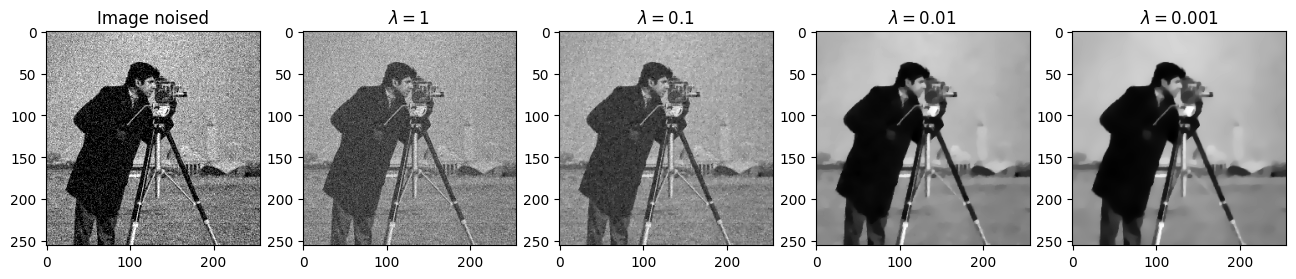

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16, 6))

axes[0].set_title("Image noised")
axes[0].imshow(Im_noised, cmap='gray', **bounds)
    
for col, lamb in enumerate([1, 0.1, 0.01, 0.001], start=1):
    axes[col].set_title(f"$\lambda = {lamb}$")
    axes[col].imshow(Denoise_TV(Im_noised,200, lamb=lamb, eps=1, tau=0.1), cmap='gray')

In [8]:
lambd_values = [0.001, 0.01, 0.1, 1, 10]
K = 100
eps = 1.0

search_lambda_opt(Im_noised, Im_data, lambd_values, K, eps)

0.01

### Test of `Denoise_Tikhonov_Fourier` 

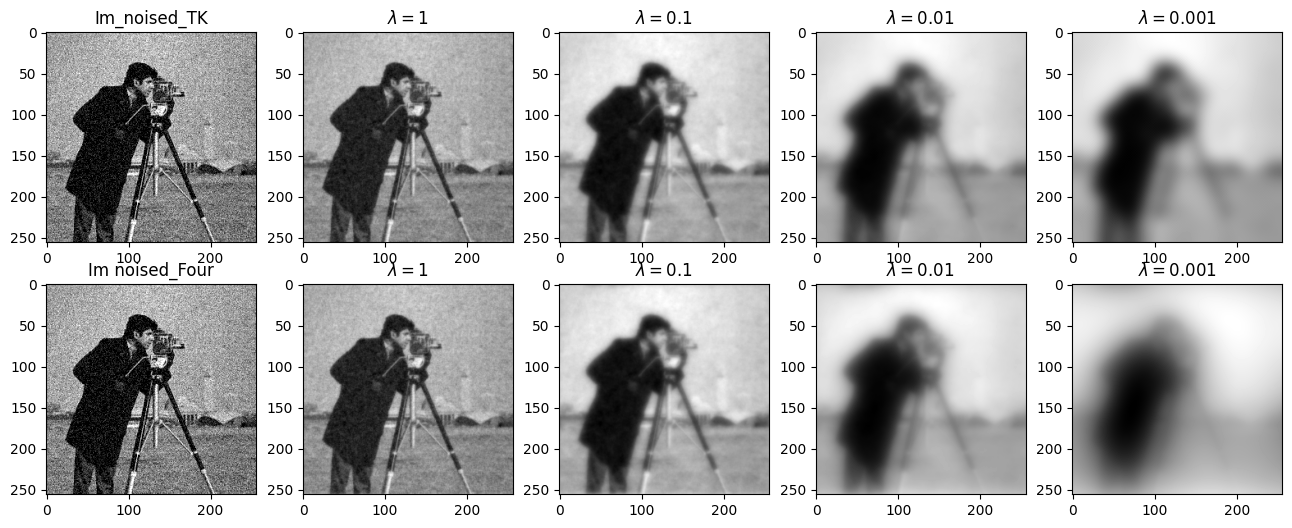

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16, 6))

for row, (title, Im) in enumerate(zip(["Im_noised_TK", "Im noised_Four"], 
                                      [Im_noised, Im_noised])):
    axes[row, 0].set_title(title)
    axes[row, 0].imshow(Im, cmap='gray', **bounds)
    

for col, lamb in enumerate([1, 0.1, 0.01, 0.001], start=1):
    axes[0, col].set_title(f"$\lambda = {lamb}$")
    axes[0, col].imshow(Denoise_Tikhonov(Im_noised,200, lamb=lamb), cmap='gray')


for col, lamb in enumerate([1, 0.1, 0.01, 0.001], start=1):
    axes[1, col].set_title(f"$\lambda = {lamb}$")
    axes[1, col].imshow(Denoise_Tikhonov_Fourier(Im_noised, lamb=lamb), cmap='gray')


# Extensions to deconvolution and inpainting

#### Load images

In [10]:
# Image : Parrot
Im_parrot = load_img('Im1.png')
Mask_parrot = load_img('Im1_mask.png')

# Image : Beach
Im_beach = load_img('Im2.png')
Mask_beach = load_img('Im2_mask.png')

# Image : Mystery text
Im_mystery = load_img('Im3.png')
Mask_mystery = load_img('Im3_mask.png')

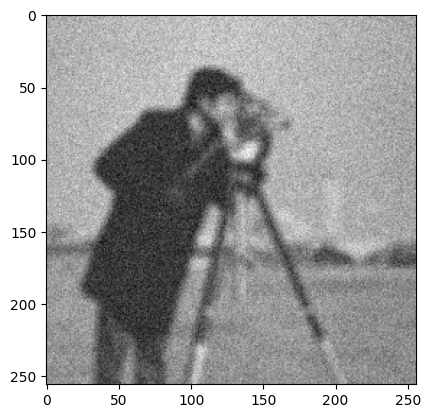

In [11]:
G = gaussian_kernel(7,5)
Im_convolved = convolve(Im_data,G)
Im_convolved_noised = add_gaussian_noise(Im_convolved,s=5) 
plt.imshow(Im_convolved_noised,cmap='gray')
plt.show()

### Test of `Deconvolution_TV`

In [10]:
best_psnr = 0  # Initialisation de la meilleure valeur de PSNR
best_params = {}  # Initialisation des meilleurs paramètres

# Listes de valeurs à tester pour chaque paramètre
lambd_values = [1, 0.1, 0.01, 0.001]
tau_values = [0.1, 0.01, 0.001]
K_values = [10, 50, 100, 200, 500]

# Parcourez toutes les combinaisons de paramètres
for lambd in lambd_values:
    for tau in tau_values:
        for K in K_values:
            # Exécutez la fonction Deconvolution_TV avec les paramètres actuels
            u = Deconvolution_TV(Im_convolved_noised, G, tau, eps, K, lambd)
            
            # Calculez le PSNR de l'image déconvoluée
            psnr = PSNR(u, Im_data)
            
            # Si le PSNR est meilleur que la meilleure valeur précédente, mettez à jour les paramètres optimaux
            if psnr > best_psnr:
                best_psnr = psnr
                best_params = {'tau': tau, 'lambd': lambd, 'K': K}

# Les meilleurs paramètres et la meilleure valeur PSNR sont stockés dans best_params et best_psnr
print("Meilleurs paramètres:", best_params)
print("Meilleur PSNR:", best_psnr)

Meilleurs paramètres: {'tau': 0.1, 'lambd': 1, 'K': 500}
Meilleur PSNR: 21.888198247583485


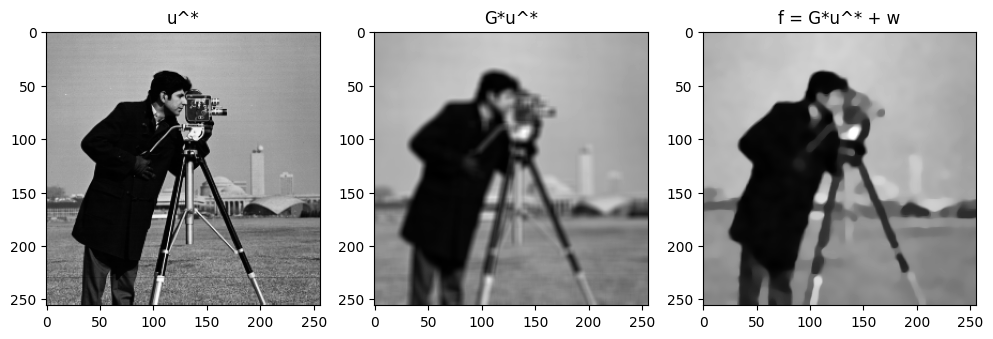

In [12]:
lamb = 1
tau = 0.1
eps = 1
K = 2000

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))

axes[0].set_title("u^*")
axes[0].imshow(Im_data, cmap='gray')
 
axes[1].set_title("G*u^*")
axes[1].imshow(Im_convolved, cmap='gray')

axes[2].set_title("f = G*u^* + w")
axes[2].imshow(Deconvolution_TV(Im_convolved_noised, G, tau, eps, K, lamb), cmap='gray')

plt.show()

### Test of `Inpainting_TV`

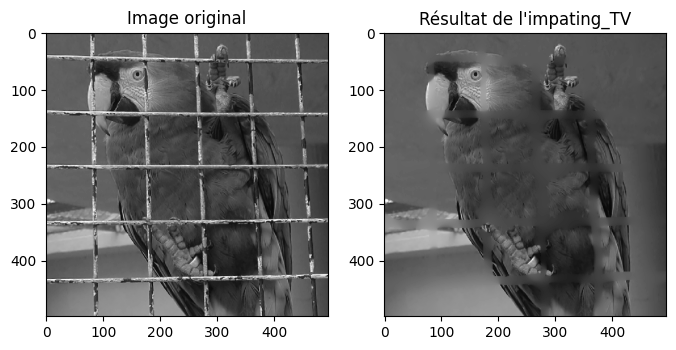

In [12]:
lamb = 0.01
tau = 1/(lamb + 4)
eps = 1
K = 2000
Inp_Dec_TV = Inpainting_TV(Im_parrot,Mask_parrot, tau, eps, K, lamb)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Image original")
plt.imshow(Im_parrot,cmap='gray')

plt.subplot(1,2,2)
plt.title("Résultat de l'impating_TV")
plt.imshow(Inp_Dec_TV, cmap='gray')
plt.show()

### Test of `Inpainting_Tikhonov`

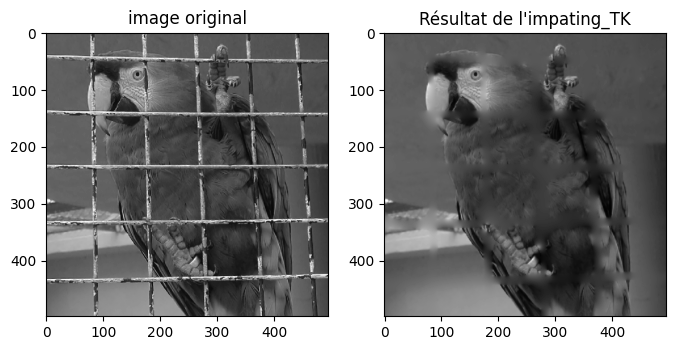

In [13]:
lamb = 0.01
tau = 0.1
K = 2000
Inp_Dec_TK = Inpainting_Tikhonov(Im_parrot,Mask_parrot, tau,  K, lamb)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("image original")
plt.imshow(Im_parrot,cmap='gray')

plt.subplot(1,2,2)
plt.title("Résultat de l'impating_TK")
plt.imshow(Inp_Dec_TK, cmap='gray')
plt.show()

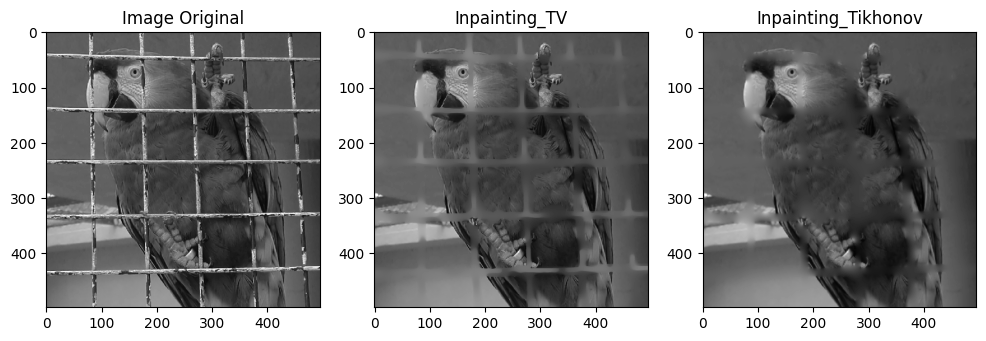

In [14]:
lamb = 0.01
tau = 0.1
eps = 1
K = 2000

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

axes[0].set_title("Image Original")
axes[0].imshow(Im_parrot, cmap='gray')
 
axes[1].set_title("Inpainting_TV")
axes[1].imshow(Inpainting_TV(Im_parrot,Mask_parrot, tau, eps, K, lamb), cmap='gray')

axes[2].set_title("Inpainting_Tikhonov")
axes[2].imshow(Inpainting_Tikhonov(Im_parrot,Mask_parrot, tau,  K, lamb), cmap='gray')

plt.show()

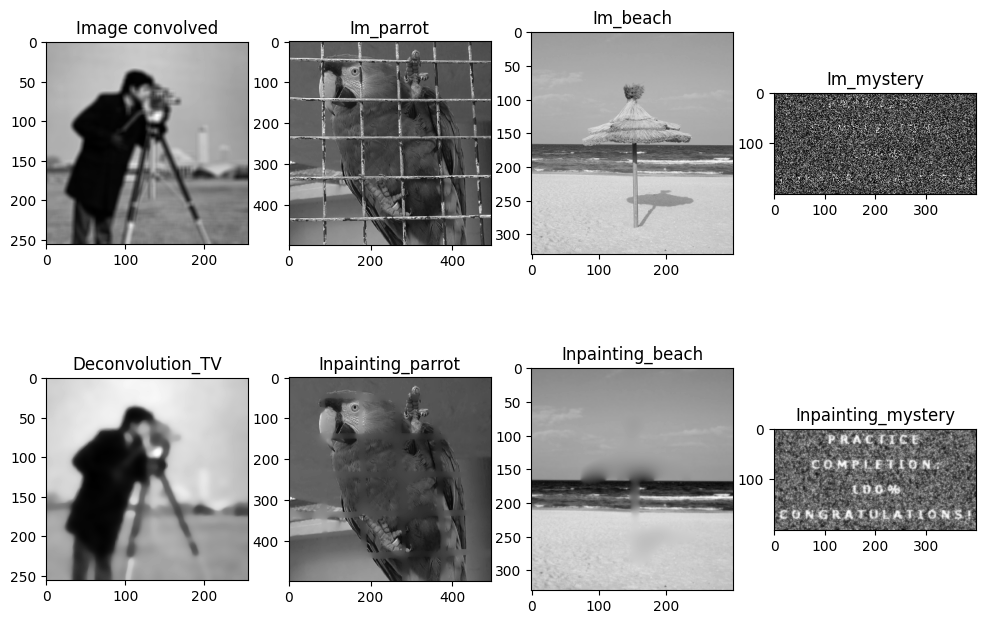

In [15]:
lamb = 0.01
tau = 0.1
K = 2000
eps = 1

fig, axes = plt.subplots(2, 4, figsize=(12, 8))

for col, (title, Im) in enumerate(zip(["Image convolved", "Im_parrot", "Im_beach", "Im_mystery"], 
                                      [Im_convolved, Im_parrot, Im_beach, Im_mystery])):
    axes[0, col].set_title(title)
    axes[0, col].imshow(Im, cmap='gray')

axes[1, 0].set_title(f'Deconvolution_TV')
axes[1, 0].imshow(Deconvolution_TV(Im_convolved_noised, G, 0.01, eps, K, 0.1), cmap='gray')

axes[1, 1].set_title(f'Inpainting_parrot')
axes[1, 1].imshow(Inpainting_TV(Im_parrot,Mask_parrot, 1/(lamb + 4), eps, K, lamb), cmap='gray')

axes[1, 2].set_title(f'Inpainting_beach')
axes[1, 2].imshow(Inpainting_Tikhonov(Im_beach,Mask_beach, tau, K, lamb), cmap='gray')

axes[1, 3].set_title(f'Inpainting_mystery')
axes[1, 3].imshow(Inpainting_Tikhonov(Im_mystery,Im_mystery, tau,  K, lamb), cmap='gray')

plt.show()

### Denoise_g1

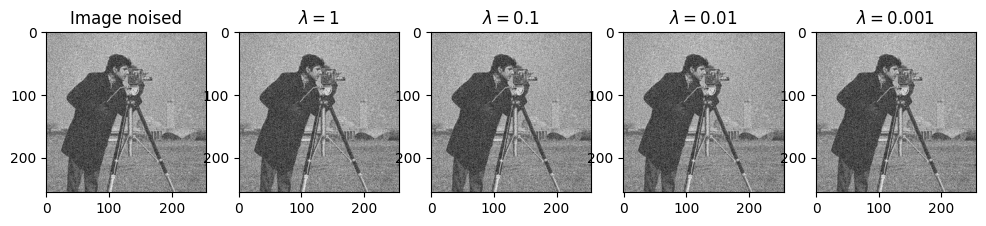

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12, 6))

axes[0].set_title("Image noised")
axes[0].imshow(Im_noised, cmap='gray')
    
for col, lamb in enumerate([1, 0.1, 0.01, 0.001], start=1):
    axes[col].set_title(f"$\lambda = {lamb}$")
    axes[col].imshow(Denoise_g1(Im_noised, 200, lamb=lamb, eps=1, tau=0.1), cmap='gray')

### Denoise_g2

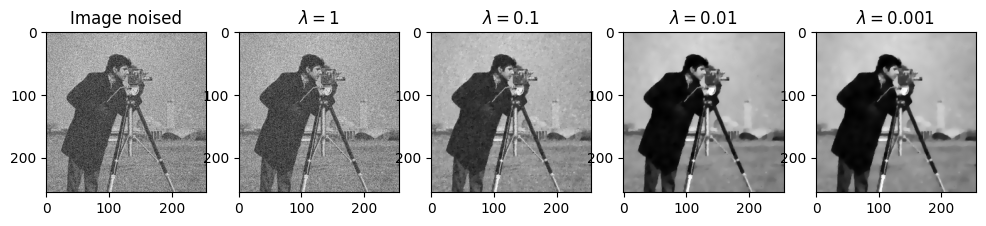

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12, 6))

axes[0].set_title("Image noised")
axes[0].imshow(Im_noised, cmap='gray')
    
for col, lamb in enumerate([1, 0.1, 0.01, 0.001], start=1):
    axes[col].set_title(f"$\lambda = {lamb}$")
    axes[col].imshow(Denoise_g2(Im_noised,200, lamb=lamb, eps=1, tau=0.1), cmap='gray')

#### Comparison `Denoise_TV`, `Denoise_g1`, `Denoise_g2`

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(12, 8))

for row, (title, Im) in enumerate(zip(["Im_noised_TK", "Im noised_g1","Im noised_g2"], 
                                      [Im_noised, Im_noised, Im_noised])):
    axes[row, 0].set_title(title)
    axes[row, 0].imshow(Im, cmap='gray', **bounds)
    
for col, lamb in enumerate([1, 0.1, 0.01, 0.001], start=1):
    axes[0, col].set_title(f"$\lambda = {lamb}$")
    axes[0, col].imshow(Denoise_TV(Im_noised,200, lamb=lamb, eps=1, tau=0.1), cmap='gray')

for col, lamb in enumerate([1, 0.1, 0.01, 0.001], start=1):
    axes[1, col].set_title(f"$\lambda = {lamb}$")
    axes[1, col].imshow(Denoise_g1(Im_noised,200, lamb=lamb, eps=1, tau=0.1), cmap='gray')
    
for col, lamb in enumerate([1, 0.1, 0.01, 0.001], start=1):
    axes[2, col].set_title(f"$\lambda = {lamb}$")
    axes[2, col].imshow(Denoise_g2(Im_noised,200, lamb=lamb, eps=1, tau=0.1), cmap='gray')
